In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

Populating the interactive namespace from numpy and matplotlib


C:\Users\MO\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

C:\Users\MO\Anaconda2\lib\site-packages\theano\sandbox\cuda\__init__.py:556: UserWarning: Theano flag device=gpu* (old gpu back-end) only support floatX=float32. You have floatX=float64. Use the new gpu back-end with device=cuda* for that value of

In [2]:
## Read data from the CSV file
data = pd.read_csv('train.csv')
parent_data = data.copy()
ID = data.pop('id')

In [3]:
## Since the labels are textual, so we encode them categorically
y = data.pop('species')
y = LabelEncoder().fit(y).transform(y)
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation
y_cat = to_categorical(y)

## Most of the learning algorithms are prone to feature scaling
## Standardising the data to give zero mean =)
X = StandardScaler().fit(data).transform(data)

In [7]:
model = Sequential()
model.add(Dense(500, input_dim=192,  init='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(99, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=400)
history = model.fit(X, y_cat, batch_size=192, nb_epoch=1600, verbose=0, validation_split=0.1, callbacks=[early_stopping])

In [8]:
## we need to consider the loss for final submission to leaderboard
## print(history.history.keys())
print('val_acc: ',max(history.history['val_acc']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['acc']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

('val_acc: ', 1.0)
('val_loss: ', 7.0367001171689481e-05)
('train_acc: ', 1.0)
('train_loss: ', 1.202127520221466e-07)
()
('train/val loss ratio: ', 0.0017083682695080004)


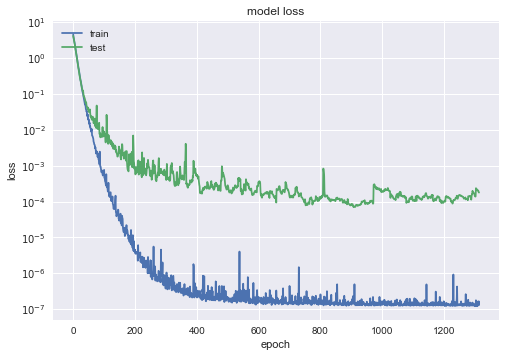

In [9]:
#('val_acc: ', 1.0)
#('val_loss: ', 0.00063468364533036947)
#('train_acc: ', 1.0)
#('train_loss: ', 1.4041546529922693e-07)
#()
#('train/val loss ratio: ', 0.00022123693643647774)

#######
#('val_acc: ', 1.0)
#('val_loss: ', 0.0016026372322812676)
#('train_acc: ', 1.0)
#('train_loss: ', 0.00022744792150323072)
#()
#('train/val loss ratio: ', 0.14192102674381954)
#
#####
#('val_acc: ', 1.0)
#('val_loss: ', 0.037783313542604446)
#('train_acc: ', 1.0)
#('train_loss: ', 0.020028734011063403)
#()
#('train/val loss ratio: ', 0.53009469348099958)
########
#('val_acc: ', 1.0)
#('val_loss: ', 4.1490425246593077e-06)
#('train_acc: ', 1.0)
#('train_loss: ', 1.2830720802473789e-07)
#()
#('train/val loss ratio: ', 0.030924534338262449)
#####
# summarize history for loss
## Plotting the loss with the number of iterations
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

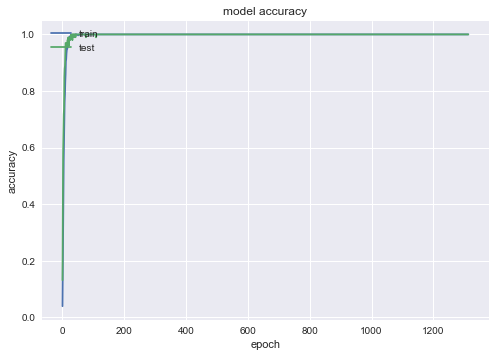

In [10]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
## read test file
test = pd.read_csv('test.csv')
index = test.pop('id')
test = StandardScaler().fit(test).transform(test)
yPred = model.predict_proba(test)

## Converting the test predictions in a dataframe as depicted by sample submission
yPred = pd.DataFrame(yPred,index=index,columns=sort(parent_data.species.unique()))

fp = open('keras9-1.csv','w')
fp.write(yPred.to_csv())

576/594 [============================>.] - ETA: 0s